In [ ]:
# Polynomial regression 多項式回帰
# 非線形データに線形モデルを適合させる
# 各特徴量の累乗を新特徴量として追加して、このセットで線形モデルを訓練する
# これは多項式回帰は特徴量の組み合わせを見つけることができるため

In [4]:
import numpy as np
import numpy.random as rnd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

np.random.seed(42)

In [2]:
m = 100
X = 6 * np.random.rand(m, 1) - 3 # 単純な二次方程式
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) # 二次方程式にノイズを混ぜる

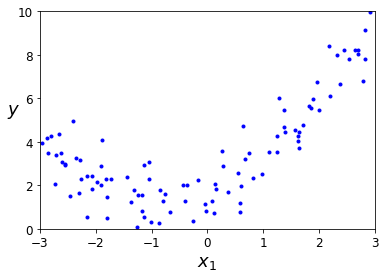

In [5]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.savefig("quadratic_data_plot")
plt.show()

In [6]:
# 
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X) # Xの元々も特徴量とこの特徴量の二乗を加えたもの
X[0]

array([-0.75275929])

In [7]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [9]:
# scikit-learnで実装
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

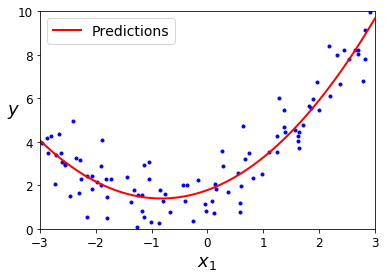

In [12]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.savefig("quadratic_predictions_plot")
plt.show()